# FCNN for Non Linear Classification

In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.special import softmax

In [2]:
path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/NLS_Group22.txt"

In [62]:
data = pd.read_csv(path, header=None, delimiter=" ")
data = pd.DataFrame(data)
data = data.drop([2], axis=1)

In [100]:
class1 = data.iloc[:500]
y1 = np.ones(len(class1))

class2 = data.iloc[501:1000]
y2 = np.array([2 for i in range(len(class2))])

class3 = data.iloc[1001:2000]
y3 = np.array([3 for i in range(len(class3))])

class1

,0,1
0,-0.266484,0.574908
1,-0.336049,0.648162
2,0.886191,1.179274
3,1.552619,1.225525
4,1.831822,0.585167
...,...,...
495,2.390516,0.237797
496,0.860039,1.411000
497,2.339808,-0.307577
498,2.346042,0.367304


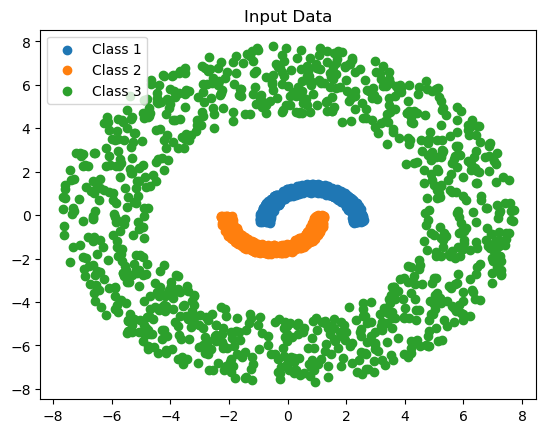

In [63]:
plt.scatter(class1[0], class1[1])
plt.scatter(class2[0], class2[1])
plt.scatter(class3[0], class3[1])

plt.legend(['Class 1','Class 2','Class 3'])
plt.title("Input Data")
plt.show()

In [35]:
def split_data(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    print(l1, l2)
    training = data.iloc[:l1]
    validation = data.iloc[l1:l2]
    test = data.iloc[l2:m]
    
    return training, validation, test

In [125]:
training1, validation1, test1 = split_data(class1)
print(training1.shape, validation1.shape, test1.shape)

training2, validation2, test2 = split_data(class2)
print(training2.shape, validation2.shape, test2.shape)

training3, validation3, test3 = split_data(class3)
print(training3.shape, validation3.shape, test3.shape)

yt1 = np.array([1 for i in range(len(test1))])
yt2 = np.array([2 for i in range(len(test2))])
yt3 = np.array([3 for i in range(len(test3))])

yv1 = np.array([1 for i in range(len(validation1))])
yv2 = np.array([2 for i in range(len(validation2))])
yv3 = np.array([3 for i in range(len(validation3))])

ytr1 = np.array([1 for i in range(len(training1))])
ytr2 = np.array([2 for i in range(len(training2))])
ytr3 = np.array([3 for i in range(len(training3))])

300 400
(300, 2) (100, 2) (100, 2)
299 398
(299, 2) (99, 2) (101, 2)
599 798
(599, 2) (199, 2) (201, 2)


# Creating a layer

In [37]:
np.random.seed(0)

In [43]:
class layer():
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.randn(n_inputs, n_neurons)
        self.bias = np.zeros((1, n_neurons))
        #print(self.weights, self.bias)
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights)+self.bias


In [39]:
class sigmoidal_activation():
    
    def forward(self, inputs):
        self.output = 1/(1+np.exp(inputs))

In [89]:
class softmax():
    
    def forward(self, inputs):
        exp = np.exp(inputs-np.sum(inputs, axis=1, keepdims=True))
        self.output = exp/np.sum(exp, axis=1, keepdims=True)

In [114]:
class loss_function():
    
    def calculate(self, output, y):
        sample_loss = self.forward(output, y)
        return np.mean(sample_loss)

In [123]:
class instantaneous_error(loss_function):
    
    def forward(self, predicted, true):
        n = len(predicted)
        predicted = np.clip(predicted, 1e-7, 1-1e-7)
        if len(true.shape) == 1:
            correct_confidence = predicted[range(n), true]
            
        elif len(true.shape) == 2:
            correct_confidence = np.sum(predicted*true, axis=1)
            
        return -np.log(correct_confidence)
            

In [116]:
layer1 = layer(2, 5)
layer2 = layer(5, 3)

activation1 = sigmoidal_activation()
activation2 = softmax()

layer1.forward(training1)
activation1.forward(layer1.output)

In [117]:
layer2.forward(activation1.output)
activation2.forward(layer2.output)
#print(activation2.output)

In [126]:
loss_fun = instantaneous_error()
loss = loss_fun.calculate(activation2.output, ytr1)

In [127]:
loss

1.6294207256474253